In [175]:
import pandas as pd

In [176]:
df = pd.read_csv("https://raw.githubusercontent.com/jinchen1036/Product-Price-Prediction/main/data/sample_data.csv")

In [177]:
df.shape

(1000, 8)

In [178]:
df.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   train_id           1000 non-null   int64  
 1   name               1000 non-null   object 
 2   item_condition_id  1000 non-null   int64  
 3   category_name      996 non-null    object 
 4   brand_name         561 non-null    object 
 5   price              1000 non-null   float64
 6   shipping           1000 non-null   int64  
 7   item_description   1000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 62.6+ KB


In [180]:
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,748447,Polaroid Camera,3,Electronics/Cameras & Photography/Film Photogr...,NaN,27.0,1,Film not included
1,674932,Vintage Ashtray,3,Vintage & Collectibles/Housewares/Coaster,NaN,8.0,0,Sip n Smoke ashtray. Would make a cute gift!
2,586672,Matilda Jane weekender nwt,1,Women/Women's Handbags/Other,NaN,52.0,0,NWT. Matilda Jane Clothing weekender bag. Over...
3,846012,Red Full Lace Wig,3,Women/Women's Accessories/Hair Accessories,NaN,69.0,0,12 inches
4,1026408,EQUATE NICOTINE TRANSDERMAL SYSTEM,1,Other/Daily & Travel items/Personal Care,NaN,19.0,0,13 patches left. Too strong for my husband.


## Visualizing the distribution of missing data

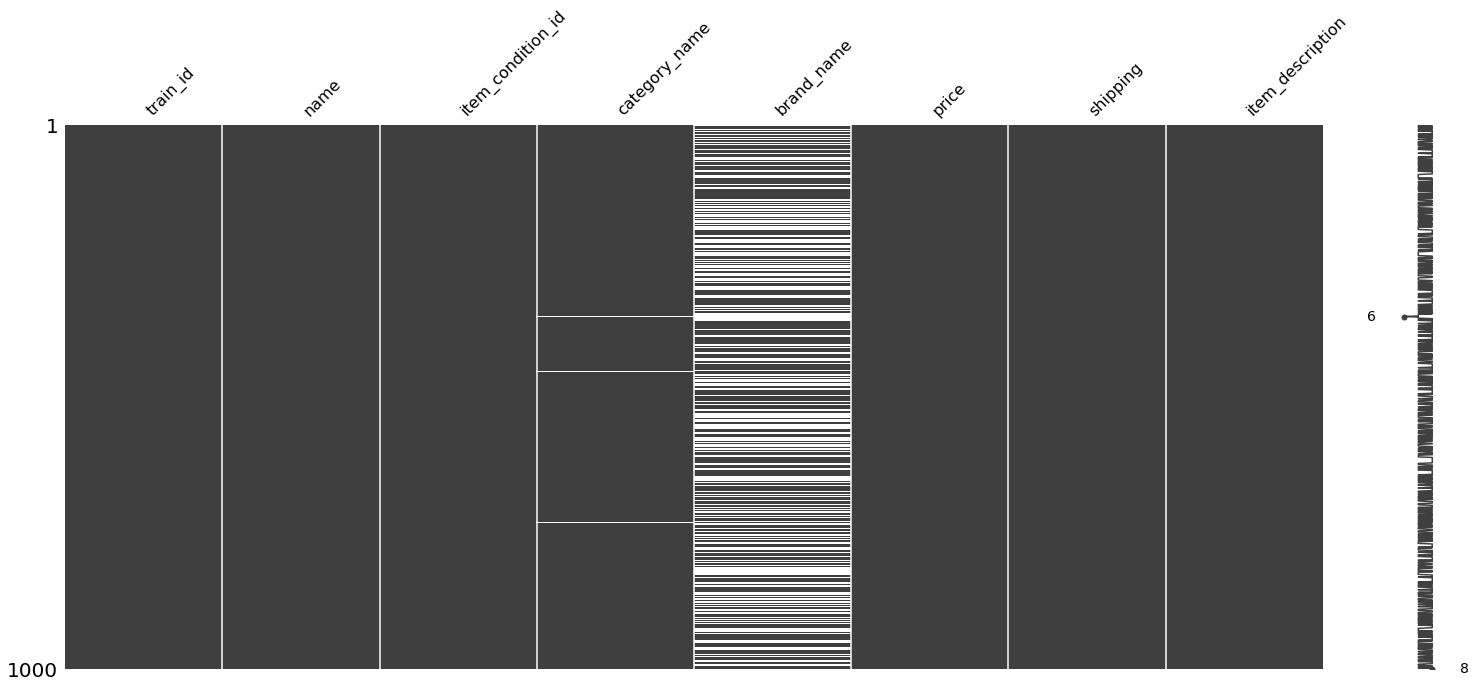

In [181]:
import missingno as msno
%matplotlib inline
msno.matrix(df.sample(1000))

In [182]:
# sort df and see which category has the most missing data
df.sort_values(by=["category_name","brand_name"],inplace=True)
df

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
662,115909,B&B Works Tutti Dolci Honey Praline FS,1,Beauty/Bath & Body/Bath,Bath & Body Works,9.0,1,"Brand new, 8 oz. Bath & Body Works Tutti Dolci..."
850,1404771,BBW Sweet Berries & Cream Hand Soaps,1,Beauty/Bath & Body/Bath,Bath & Body Works,16.0,0,Brand new never used Bath & Body Works Sweet B...
960,837627,Bath and Body Works Body Cream- Set of 3,1,Beauty/Bath & Body/Bath,Bath & Body Works,20.0,1,Three full size body creams! Sweet Magnolia an...
447,584300,Ahhh sugar sugar je'taime meringue,2,Beauty/Bath & Body/Bath,NaN,20.0,0,Ahhh sugar sugar Je'taime meringue New never u...
703,179240,VS pink robe,1,Beauty/Bath & Body/Bathing Accessories,Victoria's Secret,20.0,1,Size XS/S
...,...,...,...,...,...,...,...,...
963,1105250,thirty-one Tote,2,Women/Women's Handbags/Totes & Shoppers,NaN,25.0,0,Grey twill polka dot tote. It's roomy enough f...
783,642294,Obey Long-Sleeve Tee,2,NaN,Obey,14.0,0,"New Obey shirt, made in India. Never worn and ..."
32,709494,Vans Purple And Blue Ombre Shoes,2,NaN,VANS,26.0,0,"Worn once. Men's size 9, women's size 10"
571,1377532,Victoria Secret,2,NaN,Victoria's Secret,15.0,1,Girl's Night Flirty peony and waterlily Unused...


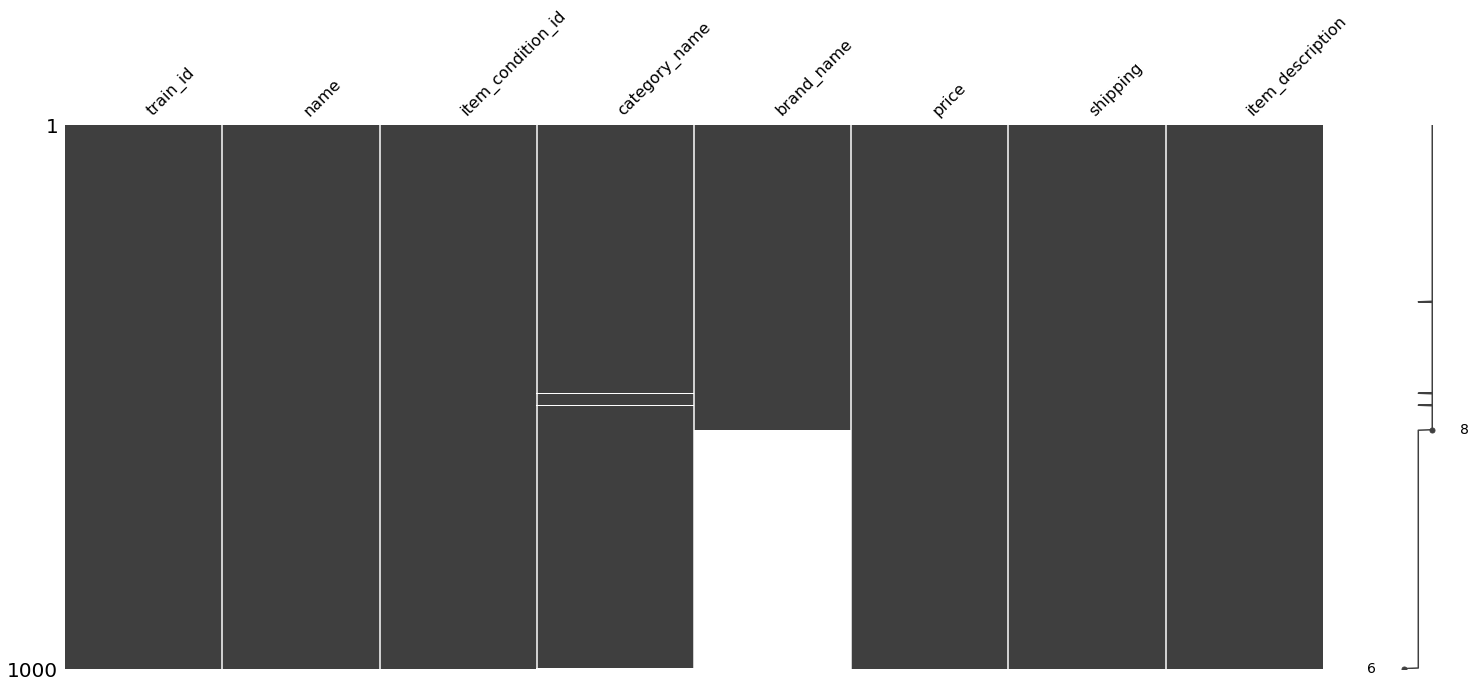

In [183]:
# isolate missing and complete data aside
missing_brand = df[df['brand_name'].isna()]
complete_brand = df[~df['brand_name'].isna()]
sorted_cate_df = df.sort_values(by="brand_name")
msno.matrix(sorted_cate_df)

In [184]:
df[df['brand_name'].isna()].info()
# only one category_name is missing under the condition of brand_name missing. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439 entries, 447 to 549
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   train_id           439 non-null    int64  
 1   name               439 non-null    object 
 2   item_condition_id  439 non-null    int64  
 3   category_name      438 non-null    object 
 4   brand_name         0 non-null      object 
 5   price              439 non-null    float64
 6   shipping           439 non-null    int64  
 7   item_description   439 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 30.9+ KB


In [185]:
df[df['category_name'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 783 to 549
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   train_id           4 non-null      int64  
 1   name               4 non-null      object 
 2   item_condition_id  4 non-null      int64  
 3   category_name      0 non-null      object 
 4   brand_name         3 non-null      object 
 5   price              4 non-null      float64
 6   shipping           4 non-null      int64  
 7   item_description   4 non-null      object 
dtypes: float64(1), int64(3), object(4)
memory usage: 288.0+ bytes


In [186]:
df[['category_name']].fillna

<bound method DataFrame.fillna of                                category_name
662                  Beauty/Bath & Body/Bath
850                  Beauty/Bath & Body/Bath
960                  Beauty/Bath & Body/Bath
447                  Beauty/Bath & Body/Bath
703   Beauty/Bath & Body/Bathing Accessories
..                                       ...
963  Women/Women's Handbags/Totes & Shoppers
783                                      NaN
32                                       NaN
571                                      NaN
549                                      NaN

[1000 rows x 1 columns]>

## Handling missing data

### Drop rows containing null

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 662 to 549
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   train_id           1000 non-null   int64  
 1   name               1000 non-null   object 
 2   item_condition_id  1000 non-null   int64  
 3   category_name      996 non-null    object 
 4   brand_name         561 non-null    object 
 5   price              1000 non-null   float64
 6   shipping           1000 non-null   int64  
 7   item_description   1000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 70.3+ KB


In [194]:
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
662,115909,B&B Works Tutti Dolci Honey Praline FS,1,Beauty/Bath & Body/Bath,Bath & Body Works,9.0,1,"Brand new, 8 oz. Bath & Body Works Tutti Dolci..."
850,1404771,BBW Sweet Berries & Cream Hand Soaps,1,Beauty/Bath & Body/Bath,Bath & Body Works,16.0,0,Brand new never used Bath & Body Works Sweet B...
960,837627,Bath and Body Works Body Cream- Set of 3,1,Beauty/Bath & Body/Bath,Bath & Body Works,20.0,1,Three full size body creams! Sweet Magnolia an...
447,584300,Ahhh sugar sugar je'taime meringue,2,Beauty/Bath & Body/Bath,NaN,20.0,0,Ahhh sugar sugar Je'taime meringue New never u...
703,179240,VS pink robe,1,Beauty/Bath & Body/Bathing Accessories,Victoria's Secret,20.0,1,Size XS/S


In [204]:
def unique_item_count(df):
    unique_dict=dict()
    for _ in df.columns:
        unique_dict[_]=len(df[_].unique())
    print(unique_dict)

In [205]:
unique_item_count(df)

{'train_id': 1000, 'name': 1000, 'item_condition_id': 5, 'category_name': 293, 'brand_name': 235, 'price': 104, 'shipping': 2, 'item_description': 947}


In [206]:
# drop row containing NaN, and see how many unique items left in each column
df_drop=df.dropna()
unique_item_count(df_drop)

{'train_id': 558, 'name': 558, 'item_condition_id': 5, 'category_name': 183, 'brand_name': 233, 'price': 96, 'shipping': 2, 'item_description': 533}


In [234]:
pd.get_dummies(df_drop[['category_name', 'brand_name']], drop_first=True)

,category_name_Beauty/Bath & Body/Bathing Accessories,category_name_Beauty/Bath & Body/Cleansers,category_name_Beauty/Fragrance/Sets,category_name_Beauty/Fragrance/Women,category_name_Beauty/Makeup/Brushes & Applicators,category_name_Beauty/Makeup/Eyes,category_name_Beauty/Makeup/Face,category_name_Beauty/Makeup/Lips,category_name_Beauty/Makeup/Makeup Palettes,category_name_Beauty/Makeup/Makeup Sets,...,brand_name_YMI,brand_name_Yves Saint Laurent,brand_name_ZARA,brand_name_Zella,brand_name_beautyblender®,brand_name_kate spade new york,brand_name_lululemon athletica,brand_name_rue,brand_name_theBalm,brand_name_vineyard vines
662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
850,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
703,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
244,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
170,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [293]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.model_selection import cross_val_score
def evaluate_dt_regressor(df):
    X = pd.get_dummies(df[['category_name', 'brand_name']], drop_first=True)
    y = df.price
    n=10
    MSE=[]
    EVS=[]
    for i in range(n):
        X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=42)
        rg = tree.DecisionTreeRegressor()
        clf = rg.fit(X_train, y_train)
        y_pred = rg.predict(X_test)
        MSE.append(mean_squared_error(y_test, y_pred))
        EVS.append(explained_variance_score(y_test, y_pred))
    print("MSE: {}".format(sum(MSE)/n),"EVS: {}".format(sum(EVS)/n))

    
from sklearn.neural_network import MLPRegressor    
def evaluate_MLPRegressor(df):  
    X = pd.get_dummies(df[['category_name', 'brand_name']], drop_first=True)
    y = df.price
    X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=42)
    regr = MLPRegressor(random_state=42, max_iter=500).fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    score = regr.score(y_test, y_pred)
    print("MLP: {}".format(score))

In [295]:
# using category_name and brand_name to predict price, ignoring other features
X = pd.get_dummies(df_drop[['category_name', 'brand_name']], drop_first=True)
y = df_drop.price
X.shape

(558, 414)

In [238]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=0)

In [240]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, X_train, y_train, cv=10)

array([-0.15077984, -0.2541585 , -0.57268844, -1.91901571, -0.8098392 ,
       -0.91042012, -2.27966366, -0.46979681,  0.16098279, -0.28912143])

#### using DTregression and check the scores

In [273]:
# using DTregression and check the scores
from sklearn import tree
from sklearn.metrics import mean_squared_error, explained_variance_score
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mean_squared_error(y_test, y_pred), explained_variance_score(y_test, y_pred)

(879.3151587301587, 0.01748246724308855)

In [289]:
evaluate_dt_regressor(df_drop)

MSE: 1634.5467209264657 EVS: -0.22375536294029094


In [294]:
evaluate_MLPRegressor(df)

C:\Users\lzowe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[  4.  10.  21.  12.  84.  59.  18.   9.  15.  10.  18.   7.  12.  19.
  22.  14.  14.  13.  16.  20.  25.  11.  11.   8.   6.  19.  30.  14.
  14.  21.   8.  14.  14.  11.   7.   7.  12.  27.  10.  63.   9.  41.
   7.   9.  11.   9.  22.  10.  46.  35.  25.  10.   3.  19.  14.  15.
  12.  15.  19.  20.  22.  13.  10. 100.  44.  11.  76.  14.  54.  59.
   6.  20.  23.  20.   9.   9.   8.  18.  28.  69.  15.  23.  18.  10.
  12.  16.  15.  50.  12.  11.   5.  26.  18.  10.  26. 106.  33.  11.
  21.  25.  12.  24.  37.  18.  24.  16.   6.   5.   9.   8.  10.   9.
  36.  30.   8.  15.  60.  35.  24.  14.  19.  76.  16.  40.   5.   9.
  18.  36.  10.  11.  10.  86.   7.  25.  13.  34.  14.  54.   7.  29.
   7.   8.  14.  16.  10.  21.  26.  26.  38.  14.  20. 170.  20.  21.
  14.   6.  19.  18.   5.  14. 106.  91.  29.  46.  20.  35.  25.  10.
  21.   8.   9.  19.  25.  91.  65.   9.  15.  31.  40.  18.   3.  18.
  38.  19.  14.  37.  22.  19.   8.  46.  30.  34.  30.  29.  33.  23.
  26.  16.  10.  20.  26.  20.  20.  20.  34.  19.  19.  12.  20.   9.
  10.   7.  42.  46.  14.  11. 130.  28.  24. 116.  44.   7.   9.   9.
  15.  20.  44.  30.  16.  11.  18.  35.   6.  14.   8.  24.  14.   9.
  10.  10.  20.  19.  26.  50.  18.  12.  34.  10.   9.  21.  25.  28.
  15.  10.  24.   9.  11.  35.   7.  27.   5.   8.  80.  10.  15.   8.
  28.  13.  18.  12.   7.  34.  23.  26. 200.  10.   9.  24.  20.  10.
  24.  41.   9.  26.   4.  18.   3.  29.  24.  15.  14.  56.   5. 139.
  10.   6.  11.   7.  14. 115.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### Fill NaN with the most frequent item

In [251]:
df_imputed = df.copy()
df_imputed.category_name = df.category_name.fillna(df['category_name'].value_counts().index[0])
df_imputed.brand_name = df.brand_name.fillna(df['brand_name'].value_counts().index[0])
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 662 to 549
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   train_id           1000 non-null   int64  
 1   name               1000 non-null   object 
 2   item_condition_id  1000 non-null   int64  
 3   category_name      1000 non-null   object 
 4   brand_name         1000 non-null   object 
 5   price              1000 non-null   float64
 6   shipping           1000 non-null   int64  
 7   item_description   1000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 70.3+ KB


In [290]:
evaluate_dt_regressor(df_imputed)

MSE: 1093.3012110663635 EVS: -0.7448517020584557


### add missing data indicator

In [304]:
from sklearn.impute import SimpleImputer
import numpy as np
imr = SimpleImputer(missing_values=np.nan, strategy='most_frequent',add_indicator=True)
df1=df.copy()
imr = imr.fit(df1)
imputed_data = imr.transform(df1)
imputed_data = pd.DataFrame(imputed_data)
imputed_data
# evaluate_dt_regressor(imputed_data)

,0,1,2,3,4,5,6,7,8,9
0,115909,B&B Works Tutti Dolci Honey Praline FS,1,Beauty/Bath & Body/Bath,Bath & Body Works,9,1,"Brand new, 8 oz. Bath & Body Works Tutti Dolci...",False,False
1,1404771,BBW Sweet Berries & Cream Hand Soaps,1,Beauty/Bath & Body/Bath,Bath & Body Works,16,0,Brand new never used Bath & Body Works Sweet B...,False,False
2,837627,Bath and Body Works Body Cream- Set of 3,1,Beauty/Bath & Body/Bath,Bath & Body Works,20,1,Three full size body creams! Sweet Magnolia an...,False,False
3,584300,Ahhh sugar sugar je'taime meringue,2,Beauty/Bath & Body/Bath,PINK,20,0,Ahhh sugar sugar Je'taime meringue New never u...,False,True
4,179240,VS pink robe,1,Beauty/Bath & Body/Bathing Accessories,Victoria's Secret,20,1,Size XS/S,False,False
...,...,...,...,...,...,...,...,...,...,...
995,1105250,thirty-one Tote,2,Women/Women's Handbags/Totes & Shoppers,PINK,25,0,Grey twill polka dot tote. It's roomy enough f...,False,True
996,642294,Obey Long-Sleeve Tee,2,"Women/Athletic Apparel/Pants, Tights, Leggings",Obey,14,0,"New Obey shirt, made in India. Never worn and ...",True,False
997,709494,Vans Purple And Blue Ombre Shoes,2,"Women/Athletic Apparel/Pants, Tights, Leggings",VANS,26,0,"Worn once. Men's size 9, women's size 10",True,False
998,1377532,Victoria Secret,2,"Women/Athletic Apparel/Pants, Tights, Leggings",Victoria's Secret,15,1,Girl's Night Flirty peony and waterlily Unused...,True,False


In [208]:
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction.text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

In [210]:
corpus = df.name.to_list()
corpus

['B&B Works Tutti Dolci Honey Praline FS',
 'BBW Sweet Berries & Cream Hand Soaps',
 'Bath and Body Works Body Cream- Set of 3',
 "Ahhh sugar sugar je'taime meringue",
 'VS pink robe',
 'BBW 8 Piece Lot of Deep Cleansing Soap',
 "Victoria's Secret gift set",
 'Japanese Cherry Blossom Sprays',
 'Mac cosmetics velvet teddy fragrance new',
 'Marc Jacobs Daisy Dream',
 'Dkny be Delicious 1.7oz',
 'Vs Mist Eau So Sexy',
 'VS PINK COCONUT WATERS BODY MIST',
 'Secret Womens Perfume',
 'Passion perfume',
 'Bvlgari Au the blanc',
 'Calvin Klein travel size .33 oz',
 'Wen cleansing conditioner/smoothing glos',
 'It works! Hair Skin Nails',
 'Whole Blends',
 'Oribe Wave And Shine Spray',
 'Beard trimmer shaving guide',
 'Two belly button rings!',
 'Tarte Blending Sponge',
 'Beauty Blender For Jesse1330',
 'BEAUTY BLENDER!',
 '5 Color Sponge to Blend concealer/Makeup',
 'EyesCream Eyeshadow Palette 10 Colors',
 "Benefit They're Real mascara",
 'Huda Beauty',
 'Laura Geller Calligraphy Liquid Eyeli

In [226]:
vectorizer = TfidfVectorizer(max_features = 50)
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()

['and',
 'black',
 'blue',
 'boots',
 'boys',
 'bra',
 'bundle',
 'case',
 'dress',
 'dunn',
 'for',
 'free',
 'girl',
 'girls',
 'gold',
 'hoodie',
 'iphone',
 'jeans',
 'leggings',
 'long',
 'lularoe',
 'medium',
 'men',
 'necklace',
 'new',
 'nike',
 'nwt',
 'of',
 'one',
 'pants',
 'pink',
 'plus',
 'rae',
 'red',
 'reserved',
 'secret',
 'set',
 'shirt',
 'shoes',
 'shorts',
 'size',
 'soft',
 'tank',
 'the',
 'top',
 'victoria',
 'vs',
 'white',
 'with',
 'women']